# Discipline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import matplotlib
import operator
from tqdm import tqdm
from openpyxl import load_workbook as lw
import seaborn as sns
import os

In [2]:
adr = "./SerializedData/"

In [3]:
sns.set()

In [4]:
microDisciplines = pd.read_csv(adr+"microDisciplineNumberDynamic.csv", sep=",", delimiter=";", decimal=",").rename(columns={"Unnamed: 0":"Year"})
microDisciplines = microDisciplines.drop([118]).fillna(0)

In [5]:
disciplineAggData = microDisciplines.copy().drop(["Year"],axis=1).sum(axis=0)

In [6]:
microDisciplines2 = pd.DataFrame(columns=microDisciplines.columns)

In [7]:
l = []
for col in tqdm(microDisciplines):
        sum = 0
        for i in range(len(microDisciplines)):
            sum += microDisciplines.loc[i][col]
        l.append(sum)
microDisciplines2.loc[0] = l
microDisciplines2.drop(["Year"], axis=1, inplace=True)

256it [00:33,  7.53it/s]                                                                                                                                                   


In [8]:
microDisciplines2_Transposed = microDisciplines2.transpose().sort_values(by=0, ascending=False).rename(columns={0:"Discipline score"})

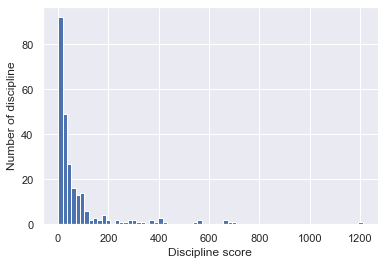

In [9]:
microDisciplines2_Transposed.plot.hist(bins=70, legend=False)
plt.ylabel("Number of discipline")
plt.xlabel("Discipline score")
plt.show()

Now, we want to see the number of contributing disipline in time

In [10]:
contributingDisciplines = microDisciplines.copy()

In [11]:
for disc in tqdm(contributingDisciplines.columns):
    if disc != "Year":
        for index in range(contributingDisciplines.count()[0]):
            if contributingDisciplines[disc][index] != 0:
                contributingDisciplines[disc][index]=1

  0%|                                                                                                                                              | 0/256 [00:00<?, ?it/s]<ipython-input-11-cf94c79577a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contributingDisciplines[disc][index]=1
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:05<00:00, 47.07it/s]


In [12]:
sum = {}
rowSum = 0
for row in tqdm(range(contributingDisciplines.count()[0])):
    rowSum = 0
    year = 0
    for col in contributingDisciplines.columns:
        if col == "Year":
            year = contributingDisciplines[col][row]
        elif col != "Year":
            rowSum += contributingDisciplines[col][row]
    sum[year] = rowSum
        

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:02<00:00, 40.40it/s]


In [13]:
contributingDisciplines["sum"] = list(sum.values())

In [14]:
contributingDisciplines.drop(contributingDisciplines.columns[1:256], axis=1, inplace=True)

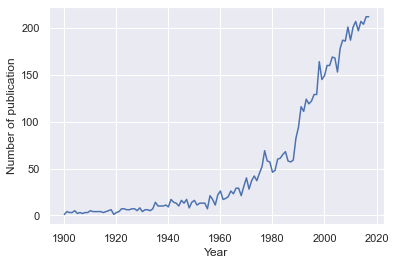

In [15]:
contributingDisciplines.plot(x="Year", y="sum", legend=False )
plt.ylabel("Number of publication")
plt.show()

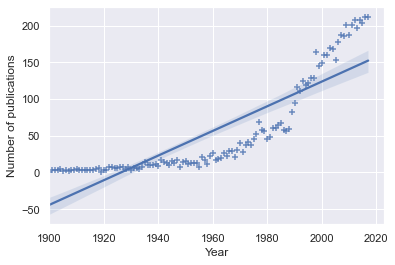

In [16]:
x = contributingDisciplines["Year"]
y = contributingDisciplines["sum"]

sns_plot = sns.regplot(x, y, marker="+", color="b", truncate=True, x_jitter=.1, order=1)
plt.ylabel("Number of publications")

fig = sns_plot.get_figure()

In [17]:
sns.set_palette("Blues")

Now, we wanna see the mixture of different disciplines in each of detected communities

In [18]:
addressBook = {
               "serializedData" : "./SerializedData/",
                "necessaryFiles" : "./necessaryFiles/",
                "dynamicGraph" : "./SerializedData/DynamicGraph/"
               }
excelWorkBook = lw(addressBook["necessaryFiles"]+"GIPP.xlsx")
excelWorkSheet = excelWorkBook["Sheet1"]
df = pd.DataFrame(excelWorkSheet.values)
GIPPcolumns = df.loc[0]
df = df.drop([0])
df.index = range(len(df))
GIPPmappingDictionary = {}
df = df.rename(columns={0:"Arts and Humanities", 1:"Clinical, Pre-Clinical and Health", 2:"Engineering and Technology", 3:"Life Sciences", 4:"Physical Sciences", 5:"Social Sciences" })
for i in GIPPcolumns:
    GIPPmappingDictionary[i] = []
for row in range(0,len(df)):
    for i in GIPPcolumns:
        GIPPmappingDictionary[i].append(df.loc[row][i])

GIPP_ReverseDictionary = {}
for macro in GIPPmappingDictionary:
    for micro in GIPPmappingDictionary[macro]:
        if micro != None:
            GIPP_ReverseDictionary[micro.strip()] = macro

In [19]:
communitiesFileAdr = "./Gephi/microdisciplineGraph.csv"

In [20]:
microdisciplinesCommunities = pd.read_csv(communitiesFileAdr).drop(["Id","timeset"],axis=1)

In [21]:
for row in tqdm(range(len(microdisciplinesCommunities))):
    microdisciplinesCommunities["Label"][row] = GIPP_ReverseDictionary[microdisciplinesCommunities["Label"][row]]

  0%|                                                                                                                                              | 0/255 [00:00<?, ?it/s]<ipython-input-21-570cebacc5c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microdisciplinesCommunities["Label"][row] = GIPP_ReverseDictionary[microdisciplinesCommunities["Label"][row]]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:00<00:00, 3455.19it/s]


In [22]:
sns.set_style("dark")

Here, we want to see the dynamic of communities in five periods : 1900~1980 - 1980~1990 - 1990~2000 - 2000~2010 - 2010~2018

In [23]:
import os
adr = "./Gephi/dynamicCommunities/"
communities = [adr+a for a in os.listdir(adr)]
communityNames = [a for a in os.listdir(adr)]

<ipython-input-24-6f3db1f27212>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microdisciplinesCommunities["Label"][row] = GIPP_ReverseDictionary[microdisciplinesCommunities["Label"][row]]


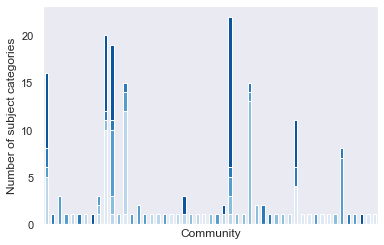

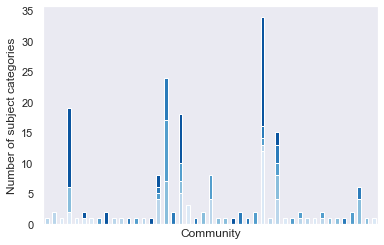

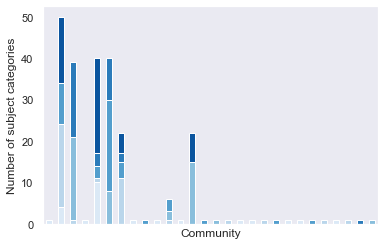

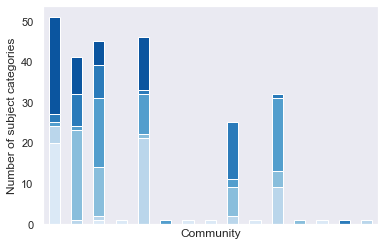

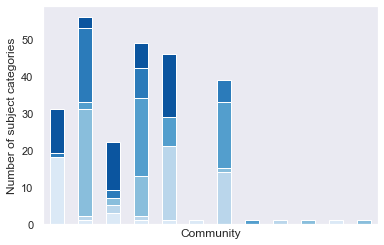

In [24]:
for i,community in enumerate(communities):
    microdisciplinesCommunities = pd.read_csv(community).drop(["Id","timeset"],axis=1)
    for row in range(len(microdisciplinesCommunities)):
        microdisciplinesCommunities["Label"][row] = GIPP_ReverseDictionary[microdisciplinesCommunities["Label"][row]]
    df2 = microdisciplinesCommunities.groupby(["modularity_class","Label"])['modularity_class'].count().unstack('Label').fillna(0)
    
    df2.plot(kind='bar', stacked=True, xticks=None, legend=None)
    plt.ylabel("Number of subject categories")
    plt.xlabel("Community")
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
    
    plt.show()

In [25]:
a = {"LS":1,\
     "ET":1,\
     "AH - CPH - SS":5, \
    "CPH - ET - LS - PS": 2, \
     "ET - PS - SS": 4, \
     "LS - PS": 3, \
     "ET - LS": 3, \
     "CPH - PS - SS": 2, \
     "ET - LS - SS": 1, \
     "CPH - LS - SS": 14, \
     "CPH - SS": 11, \
     "ET - SS": 20, \
     "ET - LS - PS": 20, \
     "CPH - LS": 24, \
     "ET - PS": 70, \
     "AH - SS": 105
    }

In [26]:
df_themeSig = pd.DataFrame.from_dict(a, orient="index")

In [27]:
df_themeSig.rename(columns = {0:"Theme Significance"}, inplace=True)

In [28]:
df_themeSig.reset_index(inplace=True)

In [29]:
df_themeSig = df_themeSig.sort_values(['Theme Significance'], ascending=False)

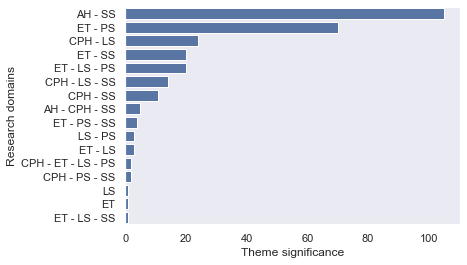

In [30]:
# Plot the total crashes
sns_plot = sns.barplot(x="Theme Significance", y="index", data=df_themeSig, color="b")
plt.ylabel("Research domains")
plt.xlabel("Theme significance")

fig = sns_plot.get_figure()